### Import statements

In [1]:
import openml
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load in datasets

In [2]:
benchmark_suite_CC18 = openml.study.get_suite('OpenML-CC18')  # obtain the benchmark suite
benchmark_suite_100 = openml.study.get_suite('OpenML100')  # obtain the benchmark suite

### Benchmark RandomForestClassifier and ExtraTreesClassifier with _default parameters_

#### The following sections use the OpenML CC-18 and 100 suites and classifies each dataset using the sklearn's RandomForest classifier and ExtraTrees classifier with default parameters. The task IDs, accuracies, and runtimes of each dataset are compiled into .txt files for later analysis

### Function for building classifiers

In [3]:
def build_classifier(classifier_name):
    if classifier_name == "RF":
        clf = sklearn.pipeline.make_pipeline(sklearn.preprocessing.Imputer(),
                                     sklearn.ensemble.RandomForestClassifier())
        return clf
    elif classifier_name == "ET":
        clf = sklearn.pipeline.make_pipeline(sklearn.preprocessing.Imputer(),
                                     sklearn.ensemble.ExtraTreesClassifier())
        return clf
    else:
        return None       

### Function for collecting dataset accuracies and runtimes

In [4]:
def get_accuracies_runtimes(dataset_suite, accuracy_txt, api_key, clf):
    f = open(accuracy_txt, 'w').close()
    for task_id in dataset_suite.tasks:  # iterate over all tasks
        try:
            f = open(accuracy_txt,"a")
            startTime = datetime.now()
            task = openml.tasks.get_task(task_id) # download the OpenML task
            openml.config.apikey = api_key  # set the OpenML Api Key
            run = openml.runs.run_model_on_task(clf, task) # run classifier on splits (requires API key)
            score = run.get_metric_fn(sklearn.metrics.accuracy_score) # print accuracy score
            f.write('%i,%s,%0.4f,%s,\n' % (task_id,task.get_dataset().name,score.mean(),str(datetime.now() - startTime)))
            f.close()
        except:
            print('Error in' + task.get_dataset().name + str(task_id))

### Set api_key

In [5]:
api_key = 'c9ea8896542dd998ea42685f14e2bc14'

### RFClassifier

In [6]:
# Build the scikit-learn RandomForest classifier
clf = build_classifier("RF")

# RF using OpenML CC-18
get_accuracies_runtimes(benchmark_suite_CC18, "RF_accuracies_runtimes_CC-18.txt", api_key, clf)

# RF using OpenML 100
get_accuracies_runtimes(benchmark_suite_100, "RF_accuracies_runtimes_100.txt", api_key, clf)

Error inhar34536


### ETClassifier

In [7]:
# Build the scikit-learn ExtraTrees classifier
clf = build_classifier("ET")

# ET using OpenML CC-18
get_accuracies_runtimes(benchmark_suite_CC18, "ET_accuracies_runtimes_CC-18.txt", api_key, clf)

# ET using OpenML 100
get_accuracies_runtimes(benchmark_suite_100, "ET_accuracies_runtimes_100.txt", api_key, clf)

Error inhar34536


### Compare accuracies and runtimes between RF and ET classifiers

#### The following sections compare the compiled accuracy and runtime results of both classifiers on the OpenML CC-18 and 100 suites. The accuracies and runtimes of each dataset are plotted against the dataset's number of features and number of samples.

### Function to collect number of samples and features for each dataset

In [8]:
def get_sampleNum_featureNum(dataset_suite):
    dimensions = [] # for all datasets: number of samples (column 0), number of features (column 1) 

    for task_id in dataset_suite.tasks:  # iterate over all tasks
        try:
            task = openml.tasks.get_task(task_id)  # download the OpenML task
            features, targets = task.get_X_and_y()  # load in dataset properties
            dimensions.append(np.shape(features)) # compile all feature and sample numbers
        except:
            print('Error in dataset ' + str(task_id)) # print task id of erring datasets
            
    return dimensions

### Function to read in each dataset's accuracies and runtimes

In [9]:
def read_accuracies_runtimes(accuracy_txt):
    acc = open(accuracy_txt,'r')

    taskID = [] # read in taskID for each dataset
    name = [] # read in name for each dataset
    accuracy = [] # read in RF accuracy for each dataset
    runtime = [] # read in RF runtime for each dataset

    for line in acc:
        fields = line.split(',')
        taskID.append(fields[0])
        name.append(fields[1])
        accuracy.append(float(fields[2]))
        runtime.append(fields[3])
    
    return taskID, name, accuracy, runtime

### Load in dataset properties, accuracies, and runtimes

##### Obtain the properties of datasets in Open ML CC-18

In [10]:
dimen_CC18 = get_sampleNum_featureNum(benchmark_suite_CC18)

##### Obtain the properties of datasets in Open ML 100

In [11]:
dimen_100 = get_sampleNum_featureNum(benchmark_suite_100)

Error in dataset 34536


##### Read in RF accuracies of OpenML CC-18 datasets

In [12]:
RF_taskID_CC18, RF_name_CC18, RF_accuracy_CC18, RF_time_CC18 = read_accuracies_runtimes("RF_accuracies_runtimes_CC-18.txt")

##### Read in RF accuracies of OpenML 100 datasets

In [13]:
RF_taskID_100, RF_name_100, RF_accuracy_100, RF_time_100 = read_accuracies_runtimes("RF_accuracies_runtimes_100.txt")

##### Read in ET accuracies of OpenML CC-18 datasets

In [14]:
ET_taskID_CC18, ET_name_CC18, ET_accuracy_CC18, ET_time_CC18 = read_accuracies_runtimes("ET_accuracies_runtimes_CC-18.txt")

##### Read in ET accuracies of OpenML 100 datasets

In [15]:
ET_taskID_100, ET_name_100, ET_accuracy_100, ET_time_100 = read_accuracies_runtimes("ET_accuracies_runtimes_100.txt")

### Find RF vs. ET accuracy differences

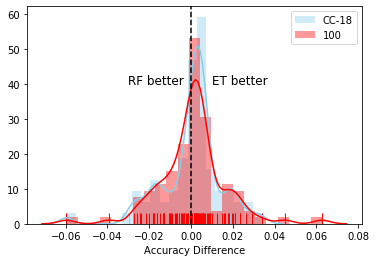

In [16]:
# collect accuracy differences (ET-RF) for each dataset in OpenML CC-18
acc_diffs_CC18 = []

for i in range(len(ET_accuracy_CC18)):
    acc_diffs_CC18.append(ET_accuracy_CC18[i]-RF_accuracy_CC18[i])

# collect accuracy differences (ET-RF) for each dataset in OpenML 100
acc_diffs_100 = []

for i in range(len(ET_accuracy_100)):
    acc_diffs_100.append(ET_accuracy_100[i]-RF_accuracy_100[i])

# plot histogram of difference values
sns.distplot(acc_diffs_CC18, color = "skyblue", label = "CC-18", rug = True)
sns.distplot(acc_diffs_100, color = "red", label = "100", rug = True)
plt.axvline(x = 0, color = 'k', linestyle = "--")
plt.text(0.01, 40, "ET better", fontsize=12)
plt.text(-0.03, 40, "RF better", fontsize=12)
plt.xlabel('Accuracy Difference')
plt.legend()

### Plot RF vs. ET accuracy differences (scatterplot)

##### OpenML CC-18

###### Set up datapoints with the accuracy differences vs. number of features and number of samples, separately

In [17]:
n_features_CC18 = []
n_samples_CC18 = []

for i in range(len(ET_time_CC18)):
    n_features_CC18.append(dimen_CC18[i][1])
    n_samples_CC18.append(dimen_CC18[i][0])

n_features_CC18 = np.vstack((n_features_CC18, acc_diffs_CC18))
n_samples_CC18 = np.vstack((n_samples_CC18, acc_diffs_CC18))

###### Function to plot each dataset's accuracy difference against either number of features or number of samples

In [18]:
def plot_acc_diff(dataset_suite, f_s_nums, f_or_s):
    df = pd.DataFrame(f_s_nums.transpose(), columns=["Number of " + f_or_s, "Accuracy differences (ET - RF): " + dataset_suite])

    g = sns.JointGrid('Number of ' + f_or_s, 'Accuracy differences (ET - RF): ' + dataset_suite, df)
    g.plot_joint(plt.scatter, color='black', edgecolor='black')
    g.plot_marginals(sns.distplot, hist=True, kde=True, color='blue')
    ax = g.ax_joint
    ax.set_xscale('log')
    g.ax_marg_x.set_xscale('log')
    ax.axhline(y=0, color = 'r', linestyle = '--')

###### Plot each dataset's accuracy difference against its number of features and number of samples

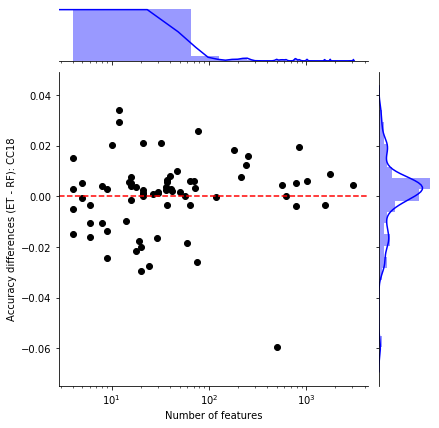

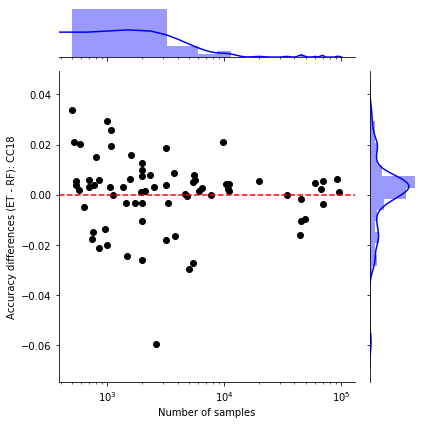

In [19]:
plot_acc_diff("CC18", n_features_CC18, "features")

plot_acc_diff("CC18", n_samples_CC18, "samples")

plt.tight_layout()

###### Plot each dataset's accuracy difference against its number of samples and number of features, with the marker size denoting the relative difference magnitude

ET was better for 45 out of 72 datasets in CC18
RF was better for 27 out of 72 datasets in CC18


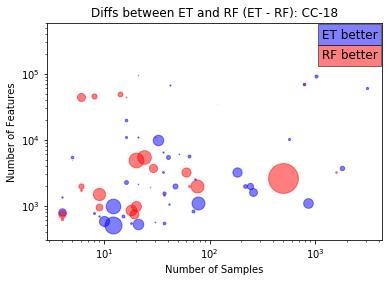

In [20]:
red_CC18 = 0
plt.figure()
for i in range(len(acc_diffs_CC18)):
    if acc_diffs_CC18[i] > 0:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'bo',MarkerSize = (acc_diffs_CC18[i])*500,alpha=0.5)
    else:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'ro',MarkerSize = (acc_diffs_CC18[i])*-500,alpha=0.5)
        red_CC18 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.ylim((300,600000))
plt.title('Diffs between ET and RF (ET - RF): CC-18')
plt.text(1150, 350000, "ET better", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(1150, 170000, "RF better", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

print('ET was better for ' + str(72-red_CC18) + ' out of 72 datasets in CC18')
print('RF was better for ' + str(red_CC18) + ' out of 72 datasets in CC18')

##### OpenML 100

###### Set up datapoints with the accuracy differences vs. number of features and number of samples, separately

In [21]:
n_features_100 = []
n_samples_100 = []

for i in range(len(ET_time_100)):
    n_features_100.append(dimen_100[i][1])
    n_samples_100.append(dimen_100[i][0])

n_features_100 = np.vstack((n_features_100, acc_diffs_100))
n_samples_100 = np.vstack((n_samples_100, acc_diffs_100))

###### Plot each dataset's accuracy difference against its number of features and number of samples

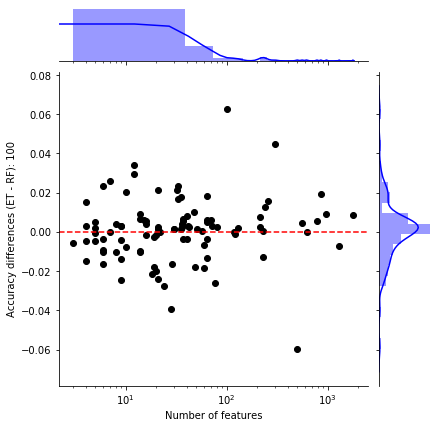

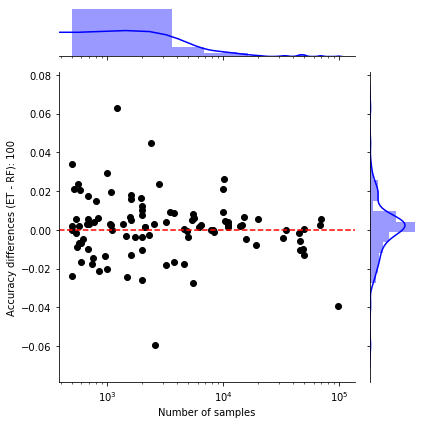

In [22]:
plot_acc_diff("100", n_features_100, "features")

plot_acc_diff("100", n_samples_100, "samples")

plt.tight_layout()

###### Plot each dataset's accuracy difference against its number of samples and number of features, with the marker size denoting the relative difference magnitude

ET was better for 56 out of 99 datasets in 100
RF was better for 43 out of 99 datasets in 100


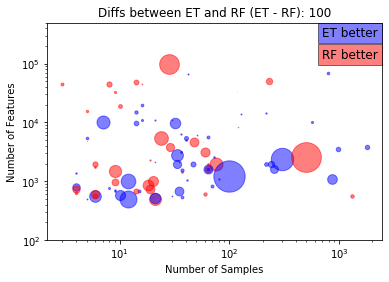

In [23]:
red_100 = 0
plt.figure()
for i in range(len(acc_diffs_100)):
    if acc_diffs_100[i] > 0:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'bo',MarkerSize = (acc_diffs_100[i])*500,alpha=0.5)
    else:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'ro',MarkerSize = (acc_diffs_100[i])*-500,alpha=0.5)
        red_100 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.ylim((100,500000))
plt.title('Diffs between ET and RF (ET - RF): 100')
plt.text(700, 290000, "ET better", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(700, 125000, "RF better", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
        
print('ET was better for ' + str(99-red_100) + ' out of 99 datasets in 100')
print('RF was better for ' + str(red_100) + ' out of 99 datasets in 100')

### Plot RF and ET runtimes (scatterplot)

##### Function to collect runtimes for each dataset

In [24]:
def get_runtimes(times):
    hours = []
    minutes = []
    seconds = []
    total_time = []
    for time in times:
        timefields = time.split(':')
        hours.append(timefields[0])
        minutes.append(timefields[1])
        seconds.append(float(timefields[2]))
        total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))
    return hours, minutes, seconds, total_time

###### Set up time fields

In [25]:
## OpenML CC-18
# ET
ET_hours_CC18, ET_minutes_CC18, ET_seconds_CC18, ET_total_time_CC18 = get_runtimes(ET_time_CC18)

# RF
RF_hours_CC18, RF_minutes_CC18, RF_seconds_CC18, RF_total_time_CC18 = get_runtimes(RF_time_CC18)

## OpenML 100
# ET
ET_hours_100, ET_minutes_100, ET_seconds_100, ET_total_time_100 = get_runtimes(ET_time_100)

# RF
RF_hours_100, RF_minutes_100, RF_seconds_100, RF_total_time_100 = get_runtimes(RF_time_100)

###### Find ET vs. RF runtime differences

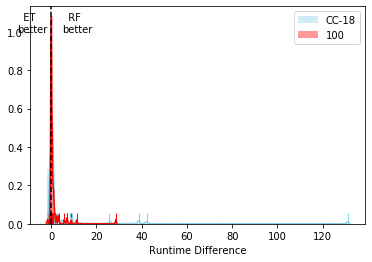

In [26]:
# collect runtime differences (RF_time-ET_time) for each dataset in OpenML CC18
time_diffs_CC18 = []

for i in range(len(ET_time_CC18)):
    time_diffs_CC18.append(RF_total_time_CC18[i]-ET_total_time_CC18[i])

# collect runtime differences (RF_time-ET_time) for each dataset in OpenML 100
time_diffs_100 = [] 

for i in range(len(ET_time_100)):
    time_diffs_100.append(RF_total_time_100[i]-ET_total_time_100[i])

# plot histogram of difference values
sns.distplot(time_diffs_CC18, color = "skyblue", label = "CC-18", rug = True)
sns.distplot(time_diffs_100, color = "red", label = "100", rug = True)
plt.axvline(x = 0, color = 'k', linestyle = "--")
plt.text(-15, 1.0, "  ET\nbetter", fontsize=10)
plt.text(5, 1.0, "  RF\nbetter", fontsize=10)
plt.xlabel('Runtime Difference')
plt.legend()

##### OpenML CC-18

###### Set up datapoints with the runtimes vs. number of features and number of samples, separately

In [27]:
n_features_CC18_time = []
n_samples_CC18_time = []

for i in range(len(ET_time_CC18)):
    n_features_CC18_time.append(dimen_CC18[i][1])
    n_samples_CC18_time.append(dimen_CC18[i][0])

n_features_CC18_time = np.vstack((n_features_CC18_time, time_diffs_CC18))
n_samples_CC18_time = np.vstack((n_samples_CC18_time, time_diffs_CC18))

###### Function to plot each dataset's accuracy difference against either number of features or number of samples

In [28]:
def plot_runtime_diff(dataset_suite, f_s_times, f_or_s):
    df = pd.DataFrame(f_s_times.transpose(), columns=["Number of " + f_or_s, "Difference in Runtime (seconds): " + dataset_suite])

    g = sns.JointGrid('Number of ' + f_or_s, 'Difference in Runtime (seconds): ' + dataset_suite, df)
    g.plot_joint(plt.scatter, color='black', edgecolor='black')
    g.plot_marginals(sns.distplot, hist=True, kde=True, color='blue')
    ax = g.ax_joint
    ax.set_xscale('log')
    g.ax_marg_x.set_xscale('log')
    ax.axhline(y=0, color = 'r', linestyle = '--')

###### Plot each dataset's runtime difference in OpenML CC-18 against its number of features and number of samples

ET was faster for 56 out of 72 datasets in CC-18
RF was faster for 16 out of 72 datasets in CC-18


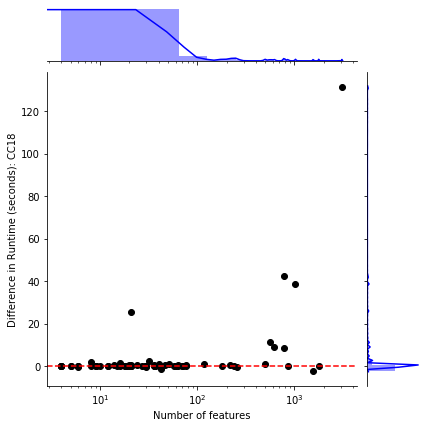

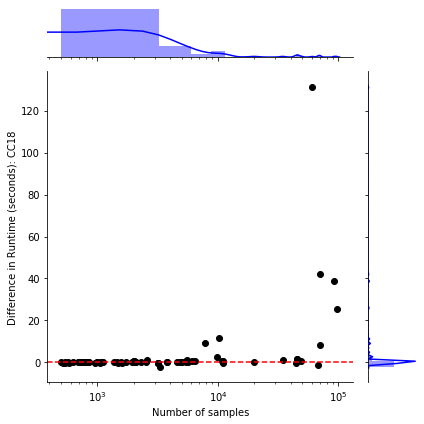

In [29]:
plot_runtime_diff("CC18", n_features_CC18_time, "features")

plot_runtime_diff("CC18", n_samples_CC18_time, "samples")

plt.tight_layout()

red_CC18 = 0

for i in range(len(time_diffs_CC18)):
    if time_diffs_CC18[i] < 0:
        red_CC18 += 1

print('ET was faster for ' + str(72-red_CC18) + ' out of 72 datasets in CC-18')
print('RF was faster for ' + str(red_CC18) + ' out of 72 datasets in CC-18')

##### OpenML 100

###### Set up datapoints with the runtimes vs. number of features and number of samples, separately

In [30]:
n_features_100_time = []
n_samples_100_time = []

for i in range(len(ET_time_100)):
    n_features_100_time.append(dimen_100[i][1])
    n_samples_100_time.append(dimen_100[i][0])

n_features_100_time = np.vstack((n_features_100_time, time_diffs_100))
n_samples_100_time = np.vstack((n_samples_100_time, time_diffs_100))

###### Plot each dataset's runtime difference in OpenML 100 against its number of features and number of samples

ET was faster for 76 out of 99 datasets in 100
RF was faster for 23 out of 99 datasets in 100


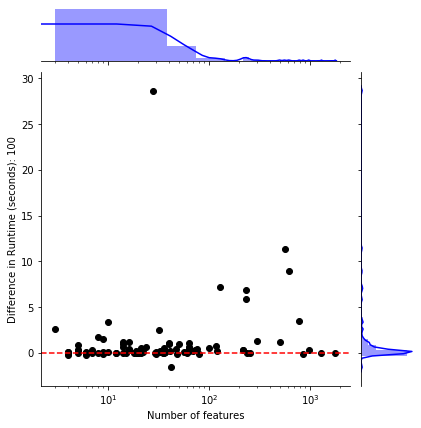

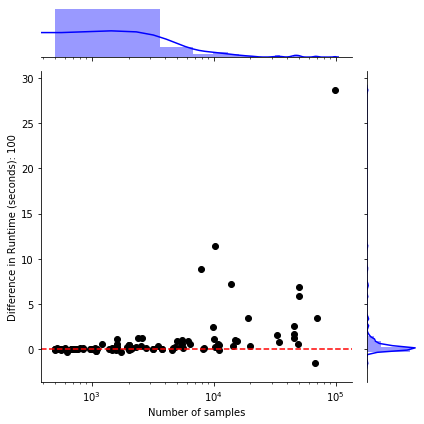

In [31]:
plot_runtime_diff("100", n_features_100_time, "features")

plot_runtime_diff("100", n_samples_100_time, "samples")

plt.tight_layout()

red_100 = 0

for i in range(len(time_diffs_100)):
    if time_diffs_100[i] < 0:
        red_100 += 1

print('ET was faster for ' + str(99-red_100) + ' out of 99 datasets in 100')
print('RF was faster for ' + str(red_100) + ' out of 99 datasets in 100')